# 데이터셋
- 타이타닉 생존자 데이터셋
   

- 구글 드라이브 연결

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 데이터 경로 변수

In [29]:
DATA_PATH = "/content/drive/MyDrive/data/"
DATA_PATH

'/content/drive/MyDrive/data/'

- 시드값

In [30]:
SEED = 42

- 데이터 불러오기

In [31]:
import pandas as pd
import numpy as np

train = pd.read_csv(f"{DATA_PATH}titanic_train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}titanic_test.csv") # 테스트 데이터
train.shape , test.shape

((916, 12), (393, 11))

- 결측치 확인하기

In [32]:
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age            180
sibsp            0
parch            0
ticket           0
fare             0
cabin          706
embarked         0
dtype: int64

In [33]:
test.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age             83
sibsp            0
parch            0
ticket           0
fare             1
cabin          308
embarked         2
dtype: int64

- 학습 데이터에서 얻은 통계량을 이용하여 결측치를 채워야한다.

In [34]:
age_mean = train["age"].mean() # 평균
fare_median = train["fare"].median() # 중앙값
cabin_unk = "UNK" # 새로운 범주
embarked_mode = train["embarked"].mode()[0] # 최빈값
age_mean , fare_median ,cabin_unk , embarked_mode

(29.904891304347824, 14.5, 'UNK', 'S')

- 학습데이터 결측치 처리

In [35]:
train["age"] = train["age"].fillna(age_mean)
train["cabin"] = train["cabin"].fillna(cabin_unk)

- 테스트데이터 결측치 처리

In [36]:
test["age"] = test["age"].fillna(age_mean)
test["fare"] = test["fare"].fillna(fare_median)
test["cabin"] = test["cabin"].fillna(cabin_unk)
test["embarked"] = test["embarked"].fillna(embarked_mode)

In [37]:
train.isnull().sum().sum() , test.isnull().sum().sum()

(0, 0)

- 특성으로 사용할 변수 추가하기

In [38]:
cols = ["age","sibsp","parch","fare","pclass","gender","embarked","cabin"]
train_ft = train[cols].copy()
test_ft = test[cols].copy() # 테스트 데이터
train_ft.shape, test_ft.shape

((916, 8), (393, 8))

- age 변수를 10으로 나눈 몫을 구해 나이대 변수 추가하기
    - 0 = 10세이하
    - 1 =  10~19세
    - 2 = 20~29세
    - ...

In [39]:
train_ft["age_range"] = (train_ft["age"] // 10).astype(int)
test_ft["age_range"] = (test_ft["age"] // 10).astype(int)

- 타겟값 target 변수에 저장

In [40]:
target = train["survived"]
target

0      0
1      0
2      0
3      1
4      1
      ..
911    1
912    0
913    0
914    0
915    0
Name: survived, Length: 916, dtype: int64

# 피처들을 조합하여 새로운 범주형 피처를 만들기

In [41]:
train_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,cabin,age_range
0,71.0,0,0,49.5042,1,male,C,UNK,7
1,34.0,0,0,8.0500,3,male,S,UNK,3
2,29.0,3,1,22.0250,3,male,S,UNK,2
3,18.0,1,1,13.0000,2,female,S,UNK,1
4,48.0,0,0,26.5500,1,male,S,E12,4


In [42]:
train_ft.nunique()

age           88
sibsp          7
parch          8
fare         246
pclass         3
gender         2
embarked       3
cabin        146
age_range      9
dtype: int64

In [43]:
cols = [ "sibsp","parch" ,"pclass","gender","embarked","age_range" ]
cols

['sibsp', 'parch', 'pclass', 'gender', 'embarked', 'age_range']

In [44]:
train_ft[cols].nunique()

sibsp        7
parch        8
pclass       3
gender       2
embarked     3
age_range    9
dtype: int64

- itertools
    - 효율적인 반복을 위한 이터레이터를 만드는 모듈

- itertools의 `combinations(iterable, n)` 함수
    - 반복가능한 객체에서 n개의 가능한 모든 조합을 튜플 형태로 꺼내준다.

In [45]:
from itertools import combinations

for col in combinations(cols, 2):
    print(col)

('sibsp', 'parch')
('sibsp', 'pclass')
('sibsp', 'gender')
('sibsp', 'embarked')
('sibsp', 'age_range')
('parch', 'pclass')
('parch', 'gender')
('parch', 'embarked')
('parch', 'age_range')
('pclass', 'gender')
('pclass', 'embarked')
('pclass', 'age_range')
('gender', 'embarked')
('gender', 'age_range')
('embarked', 'age_range')


- 학습데이터

In [46]:
for col in combinations(cols, 2):
    train_ft[f"{col[0]}_{col[1]}"] = train_ft[col[0]].astype(str) + "_" + train_ft[col[1]].astype(str)
train_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,cabin,age_range,sibsp_parch,...,parch_pclass,parch_gender,parch_embarked,parch_age_range,pclass_gender,pclass_embarked,pclass_age_range,gender_embarked,gender_age_range,embarked_age_range
0,71.0,0,0,49.5042,1,male,C,UNK,7,0_0,...,0_1,0_male,0_C,0_7,1_male,1_C,1_7,male_C,male_7,C_7
1,34.0,0,0,8.0500,3,male,S,UNK,3,0_0,...,0_3,0_male,0_S,0_3,3_male,3_S,3_3,male_S,male_3,S_3
2,29.0,3,1,22.0250,3,male,S,UNK,2,3_1,...,1_3,1_male,1_S,1_2,3_male,3_S,3_2,male_S,male_2,S_2
3,18.0,1,1,13.0000,2,female,S,UNK,1,1_1,...,1_2,1_female,1_S,1_1,2_female,2_S,2_1,female_S,female_1,S_1
4,48.0,0,0,26.5500,1,male,S,E12,4,0_0,...,0_1,0_male,0_S,0_4,1_male,1_S,1_4,male_S,male_4,S_4


- 테스트 데이터

In [47]:
for col in combinations(cols, 2):
    test_ft[f"{col[0]}_{col[1]}"] = test_ft[col[0]].astype(str) + "_" + test_ft[col[1]].astype(str)
test_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,cabin,age_range,sibsp_parch,...,parch_pclass,parch_gender,parch_embarked,parch_age_range,pclass_gender,pclass_embarked,pclass_age_range,gender_embarked,gender_age_range,embarked_age_range
0,62.000000,0,0,26.5500,1,male,S,C87,6,0_0,...,0_1,0_male,0_S,0_6,1_male,1_S,1_6,male_S,male_6,S_6
1,28.000000,0,0,47.1000,1,male,S,UNK,2,0_0,...,0_1,0_male,0_S,0_2,1_male,1_S,1_2,male_S,male_2,S_2
2,24.000000,0,0,9.5000,3,male,S,UNK,2,0_0,...,0_3,0_male,0_S,0_2,3_male,3_S,3_2,male_S,male_2,S_2
3,29.904891,0,0,7.7333,3,female,Q,UNK,2,0_0,...,0_3,0_female,0_Q,0_2,3_female,3_Q,3_2,female_Q,female_2,Q_2
4,18.500000,0,0,7.2833,3,female,Q,UNK,1,0_0,...,0_3,0_female,0_Q,0_1,3_female,3_Q,3_1,female_Q,female_1,Q_1


# Category Encoders
- 다양한 인코딩 방식을 통해 범주형 변수를 숫자로 인코딩해주는 라이브러리
- https://contrib.scikit-learn.org/category_encoders/

- 설치하기

In [48]:
!pip install category_encoders

- import

In [49]:
import category_encoders as ce

- 수치형 , 범주형 컬럼명 리스트에 담기

In [50]:
train_ft.columns

Index(['age', 'sibsp', 'parch', 'fare', 'pclass', 'gender', 'embarked',
       'cabin', 'age_range', 'sibsp_parch', 'sibsp_pclass', 'sibsp_gender',
       'sibsp_embarked', 'sibsp_age_range', 'parch_pclass', 'parch_gender',
       'parch_embarked', 'parch_age_range', 'pclass_gender', 'pclass_embarked',
       'pclass_age_range', 'gender_embarked', 'gender_age_range',
       'embarked_age_range'],
      dtype='object')

In [51]:
cols_num = [ 'age', 'sibsp', 'parch', 'fare', 'pclass' ]
cols_cat = [ 'gender', 'embarked',
       'cabin', 'age_range', 'sibsp_parch', 'sibsp_pclass', 'sibsp_gender',
       'sibsp_embarked', 'sibsp_age_range', 'parch_pclass', 'parch_gender',
       'parch_embarked', 'parch_age_range', 'pclass_gender', 'pclass_embarked',
       'pclass_age_range', 'gender_embarked', 'gender_age_range',
       'embarked_age_range']
len(cols_num), len(cols_cat)

(5, 19)

In [52]:
train_ft[cols_cat].nunique()

gender                  2
embarked                3
cabin                 146
age_range               9
sibsp_parch            25
sibsp_pclass           15
sibsp_gender           14
sibsp_embarked         14
sibsp_age_range        34
parch_pclass           16
parch_gender           15
parch_embarked         16
parch_age_range        31
pclass_gender           6
pclass_embarked         8
pclass_age_range       24
gender_embarked         6
gender_age_range       17
embarked_age_range     25
dtype: int64

- category_encoders로 인코딩하기 위해 카테고리 자료형으로 변환(문자열도 가능)

In [53]:
train_ft[cols_cat] = train_ft[cols_cat].astype("object")
test_ft[cols_cat] = test_ft[cols_cat].astype("object")

## OneHotEncoder
- handle_unknown
    - 'value' 가 기본값으로 사이킷런의 'ignore' 와 동일

In [54]:
enc = ce.one_hot.OneHotEncoder(return_df=True)
tmp = enc.fit_transform(train_ft[cols_cat])
tmp.head()

,gender_1,gender_2,embarked_1,embarked_2,embarked_3,cabin_1,cabin_2,cabin_3,cabin_4,cabin_5,...,embarked_age_range_16,embarked_age_range_17,embarked_age_range_18,embarked_age_range_19,embarked_age_range_20,embarked_age_range_21,embarked_age_range_22,embarked_age_range_23,embarked_age_range_24,embarked_age_range_25
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# 수치형 피처와 concat
x_train = pd.concat([train_ft[cols_num],tmp],axis=1)
x_train.head()

,age,sibsp,parch,fare,pclass,gender_1,gender_2,embarked_1,embarked_2,embarked_3,...,embarked_age_range_16,embarked_age_range_17,embarked_age_range_18,embarked_age_range_19,embarked_age_range_20,embarked_age_range_21,embarked_age_range_22,embarked_age_range_23,embarked_age_range_24,embarked_age_range_25
0,71.0,0,0,49.5042,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0,0,0,8.0500,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,29.0,3,1,22.0250,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,18.0,1,1,13.0000,2,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,48.0,0,0,26.5500,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

cv = KFold(n_splits=5,shuffle=True, random_state=SEED)

- 검증 결과

In [57]:
scaler = StandardScaler()
model = LogisticRegression(random_state=SEED)
x_train = scaler.fit_transform(x_train)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores) # 교차검증 결과

0.8707359434797508

## CountEncoder
- handle_unknown
    - 테스트셋에 transform할 때 새로운 범주가 나올때 인코딩할 값 지정
    - 기본적으로 nan 이 생성된다. 정수값을 넣으면 정수값으로 대체됨

In [58]:
enc = ce.count.CountEncoder(return_df=True,handle_unknown=0)
tmp = enc.fit_transform(train_ft[cols_cat])
tmp.head()

,gender,embarked,cabin,age_range,sibsp_parch,sibsp_pclass,sibsp_gender,sibsp_embarked,sibsp_age_range,parch_pclass,parch_gender,parch_embarked,parch_age_range,pclass_gender,pclass_embarked,pclass_age_range,gender_embarked,gender_age_range,embarked_age_range
0,580,186,706,5,549,146,431,122,4,177,497,140,5,122,101,3,106,4,2
1,580,646,706,156,549,350,431,432,116,385,497,491,131,338,342,65,429,100,115
2,580,646,706,430,6,8,3,10,5,55,51,81,29,338,342,290,429,290,288
3,336,646,706,106,60,60,117,160,27,31,70,81,19,75,175,23,217,47,83
4,580,646,1,92,549,146,431,432,60,177,497,491,70,122,129,44,429,56,71


- 검증결과

In [59]:
x_train = pd.concat([train_ft[cols_num],tmp],axis=1) # 병합

scaler = StandardScaler()
model = LogisticRegression(random_state=SEED)
x_train = scaler.fit_transform(x_train)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores) # 교차검증 결과

0.8998551205107524

## BinaryEncoder
- 1부터 시작하는 정수로 범주값을 인코딩한다
- 정수를 이진수로 변경한다.


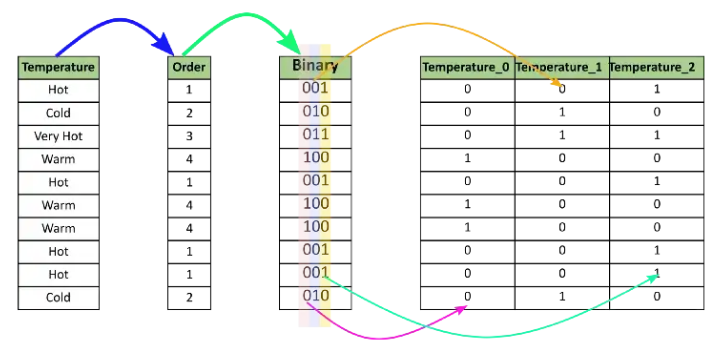

In [60]:
enc = ce.binary.BinaryEncoder(return_df=True) # handle_unknown 기본값은 'value'
tmp = enc.fit_transform(train_ft[cols_cat])
tmp.head()

,gender_0,gender_1,embarked_0,embarked_1,cabin_0,cabin_1,cabin_2,cabin_3,cabin_4,cabin_5,...,gender_age_range_0,gender_age_range_1,gender_age_range_2,gender_age_range_3,gender_age_range_4,embarked_age_range_0,embarked_age_range_1,embarked_age_range_2,embarked_age_range_3,embarked_age_range_4
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1


- 검증결과

In [61]:
x_train = pd.concat([train_ft[cols_num],tmp],axis=1) # 병합

scaler = StandardScaler()
model = LogisticRegression(random_state=SEED)
x_train = scaler.fit_transform(x_train)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores) # 교차검증 결과

0.893252819875368

- 고유값 개수가 10개 이하는 원핫 코딩 그 외는 카운트 인코딩을 해서 성능을 확인해보자

In [62]:
train_ft[cols_cat].nunique()

gender                  2
embarked                3
cabin                 146
age_range               9
sibsp_parch            25
sibsp_pclass           15
sibsp_gender           14
sibsp_embarked         14
sibsp_age_range        34
parch_pclass           16
parch_gender           15
parch_embarked         16
parch_age_range        31
pclass_gender           6
pclass_embarked         8
pclass_age_range       24
gender_embarked         6
gender_age_range       17
embarked_age_range     25
dtype: int64

In [63]:
mask = train_ft[cols_cat].nunique() <= 10
cols1 = train_ft[cols_cat].nunique().loc[mask].index.tolist()
cols2 = train_ft[cols_cat].nunique().loc[~mask].index.tolist()
len(cols1) , len(cols2)

(6, 13)

- OneHotEncoder

In [64]:
enc = ce.one_hot.OneHotEncoder(return_df=True)

# 학습데이터
tmp = enc.fit_transform(train_ft[cols1]).add_prefix("onehot_")
train_ft = pd.concat([train_ft,tmp],axis=1)

# 테스트데이터
tmp = enc.transform(test_ft[cols1]).add_prefix("onehot_")
test_ft = pd.concat([test_ft,tmp],axis=1)

- CountEncoder

In [65]:
enc = ce.count.CountEncoder(return_df=True,handle_unknown=0)

# 학습데이터
tmp = enc.fit_transform(train_ft[cols2]).add_prefix("count_")
train_ft = pd.concat([train_ft,tmp],axis=1)

# 테스트데이터
tmp = enc.transform(test_ft[cols2]).add_prefix("count_")
test_ft = pd.concat([test_ft,tmp],axis=1)

- 범주형 컬럼 제거

In [66]:
train_ft = train_ft.drop(columns = cols_cat)
test_ft = test_ft.drop(columns = cols_cat)

train_ft.shape , test_ft.shape

((916, 52), (393, 52))

- 스케일링

In [67]:
scaler = StandardScaler()


# 학습데이터
train_ft = pd.DataFrame(
    scaler.fit_transform(train_ft),
    columns = train_ft.columns
)

# 테스트 데이터
test_ft = pd.DataFrame(
    scaler.transform(test_ft),
    columns = test_ft.columns
)

- 검증결과

In [68]:
model = LogisticRegression(random_state=SEED)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores) # 교차검증 결과

0.9070621291091102

# Feature Selection 응용

## SelectPercentile 활용
- 가장 유의한 통계적 관계가 있는 피쳐를 퍼센트 별로 선택하여 cv 성능을 측정해서 최적의 피쳐 개수를 찾아보기
   

In [69]:
from tqdm.auto import tqdm
from sklearn.feature_selection import SelectPercentile
cv_scores = [] # 퍼센트값과 CV 검증점수 담을 리스트
for p in tqdm(range(5,96,1)): # 5% ~ 95%
    select = SelectPercentile(percentile=p)
    select.fit(train_ft,target)
    model = LogisticRegression(random_state=SEED)
    scores = cross_val_score(model,select.transform(train_ft),target,cv = cv ,scoring='roc_auc',n_jobs = -1)
    cv_scores.append( [p,scores.mean()] ) # 퍼센트값과 CV 검증점수를 튜플에 담아 append

cv_scores = np.array(cv_scores)
idx = np.argmax(cv_scores[:,1])
best_score = cv_scores[idx]
best_score

  0%|          | 0/91 [00:00<?, ?it/s]

array([63.        ,  0.91121921])

- 퍼센트에 따른 성능점수 추이 시각화

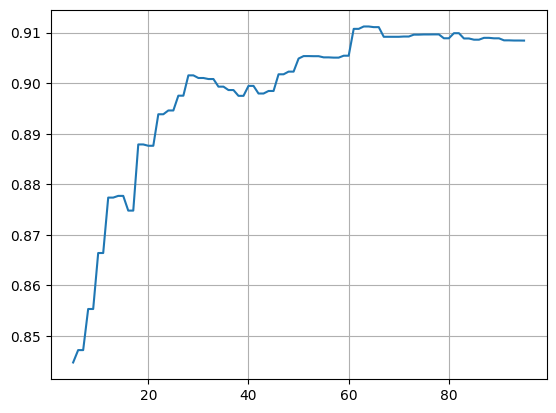

In [70]:
import matplotlib.pyplot as plt
plt.plot(cv_scores[:,0],cv_scores[:,1]) # 퍼센트를 x축 , 성능점수를 Y축
plt.grid()
plt.show()

- 최적의 피처 변수에 저장하기

In [71]:
select = SelectPercentile(percentile=best_score[0]) # 0번인덱스에 퍼센트값
select.fit(train_ft,target)
best_cols = select.get_feature_names_out()
best_cols

array(['fare', 'pclass', 'onehot_gender_1', 'onehot_gender_2',
       'onehot_age_range_3', 'onehot_age_range_6',
       'onehot_pclass_gender_2', 'onehot_pclass_gender_3',
       'onehot_pclass_gender_4', 'onehot_pclass_gender_5',
       'onehot_pclass_gender_6', 'onehot_pclass_embarked_1',
       'onehot_pclass_embarked_2', 'onehot_pclass_embarked_4',
       'onehot_gender_embarked_1', 'onehot_gender_embarked_2',
       'onehot_gender_embarked_3', 'onehot_gender_embarked_4',
       'onehot_gender_embarked_5', 'onehot_gender_embarked_6',
       'count_cabin', 'count_sibsp_parch', 'count_sibsp_pclass',
       'count_sibsp_gender', 'count_sibsp_embarked',
       'count_sibsp_age_range', 'count_parch_pclass',
       'count_parch_gender', 'count_parch_embarked',
       'count_parch_age_range', 'count_pclass_age_range',
       'count_gender_age_range', 'count_embarked_age_range'], dtype=object)

## 트리기반 모델의 중요도 활용
- 중요도 수치가 낮은 컬럼을 제거하면서 cv 성능을 측정해서 최적의 피쳐 개수를 찾아보기

In [72]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=SEED)
model.fit(train_ft,target) # 학습
ft_imp = model.feature_importances_.copy() # 피처별 중요도값
ft_imp

[LightGBM] [Info] Number of positive: 346, number of negative: 570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377729 -> initscore=-0.499198
[LightGBM] [Info] Start training from score -0.499198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


array([ 692,   11,    9, 1044,   35,   60,    5,    0,   11,   11,    0,
          5,    6,    8,    4,    4,    5,    0,    0,    1,    9,   13,
          2,    8,   12,    2,   33,    5,    8,    0,   29,    0,    0,
          5,   17,   10,    4,    9,    0,   75,   69,   53,   18,   76,
        148,   43,   16,   89,   98,   83,   34,  120], dtype=int32)

In [73]:
cv_scores = [] # 중요도값과 CV 검증점수 담을 리스트
for i in tqdm(range(20)): # 0 ~ 19
    mask = ft_imp > i
    cols = train_ft.columns[mask].tolist()
    model = LGBMClassifier(random_state=SEED)

    scores = cross_val_score(model,train_ft[cols],target,cv = cv ,scoring='roc_auc',n_jobs = -1)
    cv_scores.append([i,scores.mean()])  # 중요도값과 CV 검증점수를 튜플에 담아 append

cv_scores = np.array(cv_scores)
idx = np.argmax(cv_scores[:,1])
best_score = cv_scores[idx]
best_score

  0%|          | 0/20 [00:00<?, ?it/s]

array([13.        ,  0.89813891])

- 중요도에 따른 성능점수 추이 시각화

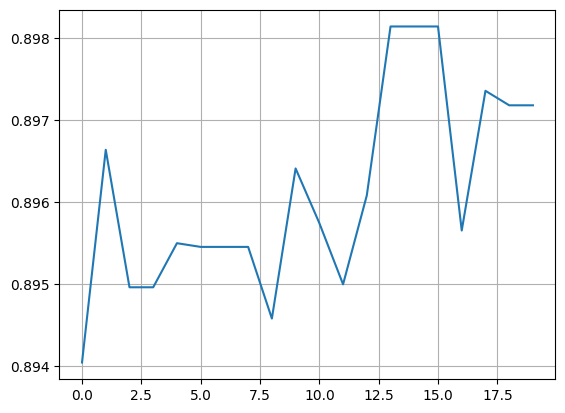

In [74]:
plt.plot(cv_scores[:,0],cv_scores[:,1]) # 중요도값을 x축 , 성능점수를 y축
plt.grid()
plt.show()

- 최적의 피처 변수에 저장하기

In [75]:
mask = ft_imp > best_score[0] # 0번인덱스에 중요도값
train_ft.columns[mask]

Index(['age', 'fare', 'pclass', 'onehot_gender_1', 'onehot_pclass_embarked_2',
       'onehot_pclass_embarked_6', 'onehot_gender_embarked_2', 'count_cabin',
       'count_sibsp_parch', 'count_sibsp_pclass', 'count_sibsp_gender',
       'count_sibsp_embarked', 'count_sibsp_age_range', 'count_parch_pclass',
       'count_parch_gender', 'count_parch_embarked', 'count_parch_age_range',
       'count_pclass_age_range', 'count_gender_age_range',
       'count_embarked_age_range'],
      dtype='object')

- 피처 선택하기

In [76]:
train_ft = train_ft[best_cols]
test_ft = test_ft[best_cols]

train_ft.shape, test_ft.shape

((916, 33), (393, 33))

# Over sampling
- 클래스 불균형 문제를 해결하는 방법
- 적은 클래스에 대하여 증식을 시키는 방식
- 대표적으로 SMOTE 방식이 있다.
- imbalanced-learn 라이브러리에 SMOTE 클래스를 사용하면 된다.
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



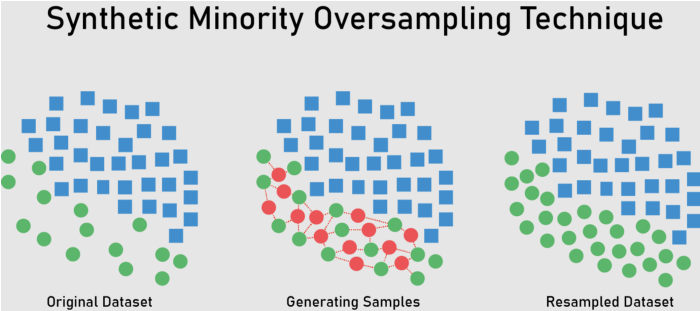

- SMOTE 클래스 주요 파라미터
    - random_state
        - 시드값
    - sampling_strategy
        - 기본값은 'auto' 이며 소수 클래스를 다수 클래스 개수에 맞춰 over sampling 한다.
        - 딕셔너리를 사용할 경우  over sampling 수를 지정할 수 있다. (key는 클래스번호, value 는 샘플수)

In [81]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=SEED,k_neighbors=5)
x_train, y_train = smote.fit_resample(train_ft,target)
x_train.shape , y_train.shape

((1140, 33), (1140,))

- 오버샘플링후 1에 대한 비율

In [82]:
target.mean() , y_train.mean()

(0.3777292576419214, 0.5)

- 오버샘플링을 할 때 주의해야 할 점은 검증데이터는 오버샘플링 하면 안된다. 검증데이터는 평가해야하는 대상이기 때문에 학습데이터만 샘플링해야 한다.

In [83]:
from sklearn.metrics import roc_auc_score
scores = [] # 폴드별 검증점수 담을 리스트
for tri,vai in cv.split(train_ft):
    # 학습
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]

    # 검증
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    smote = SMOTE(random_state=SEED,k_neighbors=5)
    x_train, y_train = smote.fit_resample(x_train,y_train) # 학습데이터만 over sampling
    model = LogisticRegression(random_state=SEED)
    model.fit(x_train,y_train)
    pred = model.predict_proba(x_valid)[:,1]
    score = roc_auc_score(y_valid,pred)
    scores.append(score)
np.mean(scores) # 교차검증 결과

0.9107082516025914

# 앙상블 응용

- catboost 설치

In [84]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [85]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

- 모델 여러개 soft voting 검증 결과 보기

In [86]:
from sklearn.ensemble import VotingClassifier
# 별칭과 모델 객체를 튜플에 담아서 리스트에 넣음
estimators = [
              ("lr",LogisticRegression(random_state=SEED)),
              ("rf",RandomForestClassifier(random_state=SEED)),
              ("mlp",MLPClassifier(random_state=SEED)),
              ("xgb",XGBClassifier(random_state=SEED)),
              ("lgb",LGBMClassifier(random_state=SEED)),
              ("cat",CatBoostClassifier(random_state=SEED)),
]


params ={
    "estimators" : estimators, # 모델 담은 리스트
    "voting" : "soft" , # soft 는 각 모델의 예측확률 평균
    "n_jobs" : -1

}

model = VotingClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores) # 교차검증 결과

0.9138499980390586

## 모델별로 가능한 모든 조합을 검증하여 최적에 앙상블 모델 조합 찾기

In [87]:
best_score = 0 # 최고 점수 초기화
for i in tqdm( range(2, len(estimators)) ) :
    for models in combinations(estimators, i):

        params ={
            "estimators" : list(models), # 모델 담은 리스트
            "voting" : "soft" , # soft 는 각 모델의 예측확률 평균
            "n_jobs" : -1
        }
        model = VotingClassifier(**params)
        scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
        score = np.mean(scores)
        if best_score < score:
            best_score = score
            best_models = models , score # 베스트 앙상블 모델조합과 점수 갱신

        print(models , score)

  0%|          | 0/4 [00:00<?, ?it/s]

(('lr', LogisticRegression(random_state=42)), ('rf', RandomForestClassifier(random_state=42))) 0.910435417821106
(('lr', LogisticRegression(random_state=42)), ('mlp', MLPClassifier(random_state=42))) 0.9173513650608867
(('lr', LogisticRegression(random_state=42)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree

In [88]:
best_models

((('lr', LogisticRegression(random_state=42)),
  ('mlp', MLPClassifier(random_state=42)),
  ('cat', <catboost.core.CatBoostClassifier at 0x7deee59da500>)),
 0.9190713515657645)

- 테스트 데이터 예측해보기

In [90]:
params ={
    "estimators" : list(best_models[0]), # 모델 담은 리스트
    "voting" : "soft" , # soft 는 각 모델의 예측확률 평균
    "n_jobs" : -1
}

model = VotingClassifier(**params)
model.fit(train_ft,target) # 학습
pred = model.predict_proba(test_ft)[:,1] # 예측
pred

array([0.22005868, 0.13210012, 0.07144898, 0.89168984, 0.75021863,
       0.56076548, 0.08680456, 0.45652571, 0.66109501, 0.9366261 ,
       0.05233445, 0.89399666, 0.96879543, 0.95312566, 0.53247922,
       0.06858523, 0.01977034, 0.04524705, 0.98846708, 0.0680125 ,
       0.10747395, 0.10692284, 0.89359992, 0.08698577, 0.03597011,
       0.13617882, 0.07203972, 0.21159298, 0.30848019, 0.12388548,
       0.66007674, 0.66453974, 0.52079943, 0.07148411, 0.68459119,
       0.0802539 , 0.96621805, 0.15389857, 0.06953269, 0.0625921 ,
       0.01758003, 0.50862653, 0.0656425 , 0.05174162, 0.25572509,
       0.10439918, 0.13453927, 0.02132286, 0.0429637 , 0.96974769,
       0.06201493, 0.06318018, 0.65789709, 0.01045256, 0.13255209,
       0.92283907, 0.40642646, 0.2787111 , 0.95265892, 0.06858523,
       0.04797549, 0.06767899, 0.28295737, 0.97485649, 0.06497153,
       0.99284654, 0.26016423, 0.06850586, 0.43609004, 0.06858523,
       0.11462104, 0.07134703, 0.07124505, 0.97730232, 0.33114

## 단일 모델에 대한 K-Fold 앙상블
- cv 개수 만큼 모델을 만들어 산술평균 하는 방법

In [92]:
model_list = [] # 폴드별 학습된 모델 담을 리스트
score_list = [] # 폴드별 검증 점수 담을 리스트
for tri,vai in cv.split(train_ft):
    # 학습
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]

    # 검증
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    # 모델 학습
    model = LGBMClassifier(random_state=SEED,n_estimators=1000,early_stopping_round=50)

    model.fit(x_train,y_train,
              eval_set = [(x_valid,y_valid)],
              )

    pred = model.predict_proba(x_valid)[:,1]
    score = roc_auc_score(y_valid,pred) # 검증셋 AUC 점수
    score_list.append(score) # 검증점수 저장
    model_list.append(model) # 학습된 모델 저장

[LightGBM] [Info] Number of positive: 276, number of negative: 456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 732, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377049 -> initscore=-0.502092
[LightGBM] [Info] Start training from score -0.502092
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [93]:
print(score_list)
np.mean(score_list) # 검증점수 평균

[0.9213032581453634, 0.937639474336722, 0.90953256302521, 0.8904943433349729, 0.9234204212210078]


0.9164780120126552

- 테스트 데이터 예측해보기

In [94]:
pred_list = [] # fold 별 학습된 모델의 예측을 담을 리스트
for model in model_list:
    pred = model.predict_proba(test_ft)[:,1]
    pred_list.append(pred)

In [95]:
pred = np.mean(pred_list,axis=0) # 산술평균
pred

array([0.27853105, 0.14884568, 0.09482445, 0.865527  , 0.78789439,
       0.47766265, 0.09541733, 0.27324484, 0.63467572, 0.88699081,
       0.08026621, 0.86477466, 0.8238485 , 0.95591623, 0.55943763,
       0.05295619, 0.05454692, 0.0915172 , 0.94256554, 0.03298838,
       0.20555334, 0.13503877, 0.86315643, 0.07502515, 0.06157095,
       0.15569842, 0.08886326, 0.17773597, 0.17311823, 0.24641679,
       0.61349539, 0.57190661, 0.5048148 , 0.20668344, 0.73970473,
       0.14941958, 0.96591915, 0.07502293, 0.06248948, 0.05974488,
       0.03104037, 0.42664483, 0.12738651, 0.03986592, 0.26351247,
       0.15152696, 0.06379677, 0.05517805, 0.04727025, 0.95460555,
       0.13231134, 0.05974488, 0.61888306, 0.0177097 , 0.13313085,
       0.8667186 , 0.58149835, 0.22422897, 0.91527895, 0.05295619,
       0.06367125, 0.10629868, 0.36017623, 0.9232176 , 0.06306441,
       0.96586338, 0.1367132 , 0.08407797, 0.47550686, 0.05295619,
       0.09422206, 0.08529461, 0.07360158, 0.96763697, 0.12398

## power mean (멱평균)

In [96]:
p = 30.5
pred = np.array(pred_list) ** p
pred = np.mean(pred,axis=0) ** (1/p)
pred

array([0.31912449, 0.2149887 , 0.12302136, 0.87286704, 0.82500738,
       0.60648748, 0.11494427, 0.34477359, 0.68787294, 0.91936158,
       0.10011459, 0.87372087, 0.90294852, 0.95727985, 0.56752658,
       0.06382056, 0.07801841, 0.12339285, 0.94872812, 0.04097565,
       0.26015745, 0.1761269 , 0.87268756, 0.11338414, 0.081548  ,
       0.19050007, 0.10874907, 0.19069906, 0.20177638, 0.27827854,
       0.70778189, 0.65028363, 0.55581037, 0.27210288, 0.76960375,
       0.19457091, 0.96824084, 0.09887049, 0.08500139, 0.08241053,
       0.07415213, 0.45230028, 0.13829195, 0.06191076, 0.30821203,
       0.21736288, 0.08539052, 0.11387762, 0.08547419, 0.95893031,
       0.20383056, 0.08241053, 0.66145935, 0.0281025 , 0.16026405,
       0.91269608, 0.66564331, 0.30583886, 0.93365114, 0.06382056,
       0.08236068, 0.14608743, 0.44797417, 0.93661917, 0.11268632,
       0.96877098, 0.16504529, 0.12277535, 0.56839005, 0.06382056,
       0.12712902, 0.10889971, 0.09003753, 0.97014355, 0.18890